# 21 -  Introduction to Deep Learning

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 0.1, May 2016

## Part of the class [Practical Machine Learning](https://github.com/albahnsen/PracticalMachineLearningClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US)

Based on the slides and presentation by [Alec Radford](https://www.youtube.com/watch?v=S75EdAcXHKk)

For this class you must install theno

```pip instal theano```

http://www.slideshare.net/indicods/deep-learning-with-python-and-the-theano-library

https://www.youtube.com/watch?v=S75EdAcXHKk

https://github.com/Newmu/Theano-Tutorials/blob/master/2_logistic_regression.py

# Motivation

How do we program a computer to recognize a picture of a
handwritten digit as a 0-9?

![1](d1.png)

### What if we have 60,000 of these images and their label?

In [13]:
from struct import unpack
import gzip
from numpy import zeros, uint8
import numpy as np

def get_labeled_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    x = zeros((N, rows, cols), dtype=uint8)  # Initialize numpy array
    y = zeros((N, 1), dtype=uint8)  # Initialize numpy array
    for i in range(N):
        if i % 10000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)

In [14]:
X_train, y_train = get_labeled_data('train-images-idx3-ubyte.gz', 
                                    'train-labels-idx1-ubyte.gz')

i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000


In [15]:
X_test, y_test = get_labeled_data('t10k-images-idx3-ubyte.gz', 
                                  't10k-labels-idx1-ubyte.gz')

i: 0


In [4]:
X_train[1][:, :10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25

In [25]:
# To vector
X_train2 = X_train.reshape((X_train.shape[0], 784)).astype(float) / 255
X_test2 = X_test.reshape((X_test.shape[0], 784)).astype(float) / 255
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
from pylab import imshow, show, cm
import matplotlib.pylab as plt
%matplotlib inline

def view_image(image, label="", predicted='', size=4):
    """View a single image."""
    plt.figure(figsize = (size, size))
    plt.imshow(image, cmap=cm.gray, )
    plt.tick_params(axis='x',which='both',  bottom='off',top='off', labelbottom='off')
    plt.tick_params(axis='y',which='both',  left='off',top='off', labelleft='off')
    show()
    if predicted == '':
        print("Label: %s" % label)
    else:
        print('Label: ', str(label), 'Predicted: ', str(predicted))
    

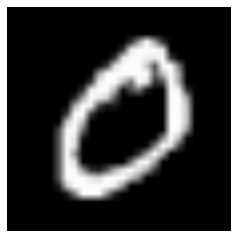

Label: 0


In [7]:
view_image(X_train[1], y_train[1])

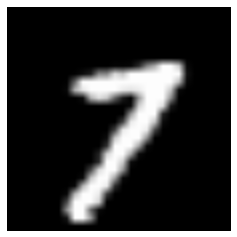

Label: 7


In [8]:
view_image(X_train[40000], y_train[40000])

# Naive model

For each image, find the “most similar” image and guess
that as the label

In [9]:
def similarity(image, images):
    similarities = []
    for img in images:
        distance = np.sum(np.sqrt(image - img))
        sim = 1 / distance
        similarities.append(sim)
    return similarities

In [10]:
np.random.seed(52)
small_train = np.random.choice(X_train.shape[0], 100)

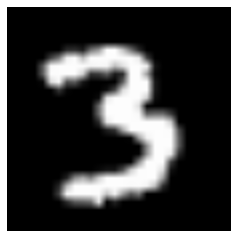

Label: 


In [11]:
view_image(X_test[500])

In [12]:
similarities = similarity(X_test[500], X_train[small_train])

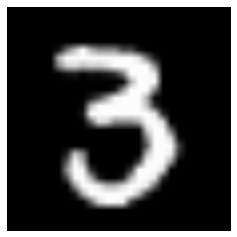

Label: 


In [13]:
view_image(X_train[small_train[np.argmax(similarities)]])

Lets try an other example

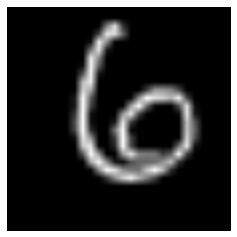

Label: 


In [14]:
view_image(X_test[100])

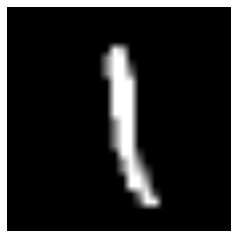

Label: 


In [15]:
similarities = similarity(X_test[100], X_train[small_train])
view_image(X_train[small_train[np.argmax(similarities)]])

# Logistic Regression

Logistic regression is a probabilistic, linear classifier. It is parametrized
by a weight matrix $W$ and a bias vector $b$ Classification is
done by projecting data points onto a set of hyperplanes, the distance to
which is used to determine a class membership probability.

Mathematically, this can be written as:

$$
  P(Y=i\vert x, W,b) = softmax_i(W x + b) 
$$
$$
   P(Y=i|x, W,b) =  \frac {e^{W_i x + b_i}} {\sum_j e^{W_j x + b_j}}
$$

The output of the model or prediction is then done by taking the argmax of
the vector whose i'th element is $P(Y=i|x)$.

$$
  y_{pred} = argmax_i P(Y=i|x,W,b)
$$

![a](d2.png)

In [1]:
import theano
from theano import tensor as T
import numpy as np

In [3]:
theano.config.floatX = 'float32'

```
Theano is a Python library that lets you to define, optimize, and evaluate mathematical expressions, especially ones with multi-dimensional arrays (numpy.ndarray). Using Theano it is possible to attain speeds rivaling hand-crafted C implementations for problems involving large amounts of data. It can also surpass C on a CPU by many orders of magnitude by taking advantage of recent GPUs.

Theano combines aspects of a computer algebra system (CAS) with aspects of an optimizing compiler. It can also generate customized C code for many mathematical operations. This combination of CAS with optimizing compilation is particularly useful for tasks in which complicated mathematical expressions are evaluated repeatedly and evaluation speed is critical. For situations where many different expressions are each evaluated once Theano can minimize the amount of compilation/analysis overhead, but still provide symbolic features such as automatic differentiation.
```

In [7]:
def floatX(X):
#     return np.asarray(X, dtype='float32')
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    #     return theano.shared(floatX(np.random.randn(*shape) * 0.01))
    # NotImplementedError: The image and the kernel must have 
    # the same type.inputs(float32), kerns(float64)
    
    temp = np.random.randn(*shape)
    temp.dtype = np.float32
    return theano.shared(floatX(temp * 0.01))

def model(X, w):
    return T.nnet.softmax(T.dot(X, w))

In [8]:
X = T.fmatrix()
Y = T.ivector()

w = init_weights((28 * 28, 10))

In [9]:
w.get_value()

array([[ -8.25928964e-06,   1.75757445e-02,   1.30474604e+23, ...,
          1.89763624e-02,   1.66547490e+25,   1.82879735e-02],
       [  5.83692705e-10,   1.64962187e-02,   1.10633992e+19, ...,
          1.92885380e-02,  -7.14082237e-34,   1.93992350e-02],
       [ -2.87076258e-15,  -1.89155266e-02,  -8.32307711e+16, ...,
         -1.86530575e-02,  -9.86660143e-06,   1.85317807e-02],
       ..., 
       [  2.49287329e+03,   1.39775164e-02,   8.40234637e-09, ...,
          1.61370840e-02,   2.26298982e+10,  -1.89585127e-02],
       [  2.68195469e+04,  -1.55193089e-02,   2.63252319e+36, ...,
         -1.87879447e-02,  -6.78115960e+29,  -1.76858604e-02],
       [ -4.59993857e+31,  -1.79423597e-02,   4.54628222e-29, ...,
          1.49159282e-02,  -5.19593659e+20,   1.10727968e-02]], dtype=float32)

initialize model

In [22]:
py_x = model(X, w)
y_pred = T.argmax(py_x, axis=1)

In [23]:
cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost=cost, wrt=w)
update = [[w, w - gradient * 0.05]]

In [24]:
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

One iteration

In [25]:
batch_size = 128

for batch in range(0, X_test.shape[0], batch_size):
    cost = train(X_train2[batch:batch+batch_size], 
                 y_train[batch:batch+batch_size])  

In [26]:
errors = [(np.mean(y_train != predict(X_train2)), 
           np.mean(y_test != predict(X_test2)))]
errors

[(0.17886666666666667, 0.1706)]

Now for 100 epochs

In [27]:
for i in range(1, 100):
    
    for batch in range(0, X_test.shape[0], batch_size):
        cost = train(X_train2[batch:batch+batch_size], 
                     y_train[batch:batch+batch_size])   
        
    errors.append((np.mean(y_train != predict(X_train2)), 
                   np.mean(y_test != predict(X_test2))))
    print(i, errors[-1])

1 (0.15245, 0.14449999999999999)
2 (0.14044999999999999, 0.1323)
3 (0.13366666666666666, 0.1255)
4 (0.12846666666666667, 0.1217)
5 (0.12488333333333333, 0.1174)
6 (0.12191666666666667, 0.1152)
7 (0.11963333333333333, 0.11219999999999999)
8 (0.11743333333333333, 0.1095)
9 (0.11566666666666667, 0.1079)
10 (0.11385000000000001, 0.1072)
11 (0.11233333333333333, 0.1056)
12 (0.11118333333333333, 0.1043)
13 (0.11003333333333333, 0.1033)
14 (0.1091, 0.1028)
15 (0.10821666666666667, 0.10199999999999999)
16 (0.10721666666666667, 0.1011)
17 (0.10614999999999999, 0.1002)
18 (0.1052, 0.0998)
19 (0.10451666666666666, 0.099699999999999997)
20 (0.10408333333333333, 0.099099999999999994)
21 (0.10345, 0.098900000000000002)
22 (0.10301666666666667, 0.098100000000000007)
23 (0.10241666666666667, 0.097699999999999995)
24 (0.10185, 0.097100000000000006)
25 (0.10133333333333333, 0.097100000000000006)
26 (0.10081666666666667, 0.096600000000000005)
27 (0.10026666666666667, 0.096500000000000002)
28 (0.100033333

In [28]:
res = np.array(errors)

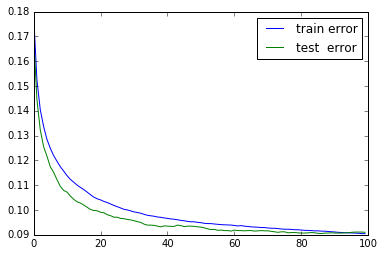

In [29]:
plt.plot(np.arange(res.shape[0]), res[:, 0], label='train error')
plt.plot(np.arange(res.shape[0]), res[:, 1], label='test  error')
plt.legend()

### Checking the results

In [30]:
y_pred = predict(X_test2)

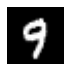

Label:  9 Predicted:  9


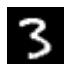

Label:  3 Predicted:  3


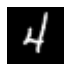

Label:  4 Predicted:  4


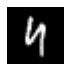

Label:  4 Predicted:  4


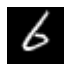

Label:  6 Predicted:  6


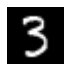

Label:  3 Predicted:  3


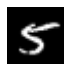

Label:  5 Predicted:  5


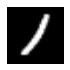

Label:  1 Predicted:  1


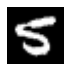

Label:  5 Predicted:  5


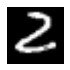

Label:  2 Predicted:  2


In [31]:
np.random.seed(2)
small_test = np.random.choice(X_test.shape[0], 10)

for i in small_test:
    view_image(X_test[i], label=y_test[i], predicted=y_pred[i], size=1)


# Simple Neural Net

Add a hidden layer with a sigmoid activation function

![a](d3.png)

In [10]:
def sgd(cost, params, lr=0.05):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        updates.append([p, p - g * lr])
    return updates

def model(X, w_h, w_o):
    h = T.nnet.sigmoid(T.dot(X, w_h))
    pyx = T.nnet.softmax(T.dot(h, w_o))
    return pyx

w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

py_x = model(X, w_h, w_o)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
params = [w_h, w_o]
updates = sgd(cost, params)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

In [117]:
batch_size = 128
errors = []

for i in range(1, 100):
    
    for batch in range(0, X_test.shape[0], batch_size):
        cost = train(X_train2[batch:batch+batch_size], 
                     y_train[batch:batch+batch_size])   
        
    errors.append((np.mean(y_train != predict(X_train2)), 
                   np.mean(y_test != predict(X_test2))))
    print(i, errors[-1]) 

1 (0.77108333333333334, 0.7661)
2 (0.59373333333333334, 0.58489999999999998)
3 (0.51791666666666669, 0.51060000000000005)
4 (0.43590000000000001, 0.42820000000000003)
5 (0.38059999999999999, 0.37519999999999998)
6 (0.32276666666666665, 0.31690000000000002)
7 (0.2651, 0.26300000000000001)
8 (0.22598333333333334, 0.22509999999999999)
9 (0.20226666666666668, 0.19850000000000001)
10 (0.18609999999999999, 0.18329999999999999)
11 (0.17485000000000001, 0.1709)
12 (0.1673, 0.16270000000000001)
13 (0.15975, 0.15340000000000001)
14 (0.15333333333333332, 0.14849999999999999)
15 (0.14899999999999999, 0.14230000000000001)
16 (0.14468333333333333, 0.13930000000000001)
17 (0.14069999999999999, 0.13539999999999999)
18 (0.13780000000000001, 0.1308)
19 (0.13481666666666667, 0.12790000000000001)
20 (0.13196666666666668, 0.12540000000000001)
21 (0.12953333333333333, 0.1232)
22 (0.12768333333333334, 0.12139999999999999)
23 (0.12583333333333332, 0.1192)
24 (0.12425, 0.1178)
25 (0.12265, 0.11700000000000001)

In [118]:
res = np.array(errors)

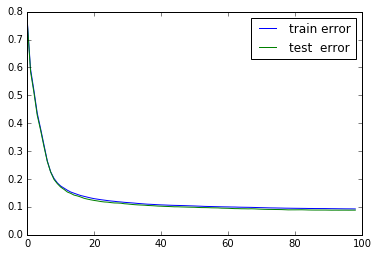

In [119]:
plt.plot(np.arange(res.shape[0]), res[:, 0], label='train error')
plt.plot(np.arange(res.shape[0]), res[:, 1], label='test  error')
plt.legend()

# Complex Neural Net

Two hidden layers with dropout

![a](d4.png)

In [21]:
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams

srng = RandomStreams()

def rectify(X):
    return T.maximum(X, 0.)

### Understanding rectifier units
![A](d5.png)

In [11]:
def RMSprop(cost, params, lr=0.001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        acc = theano.shared(p.get_value() * 0.)
        acc_new = rho * acc + (1 - rho) * g ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        g = g / gradient_scaling
        updates.append((acc, acc_new))
        updates.append((p, p - lr * g))
    return updates

![a](d6.png)

In [12]:
def dropout(X, p=0.):
    if p > 0:
        retain_prob = 1 - p
        X *= srng.binomial(X.shape, p=retain_prob, dtype=theano.config.floatX)
        X /= retain_prob
    return X

def model(X, w_h, w_h2, w_o, p_drop_input, p_drop_hidden):
    X = dropout(X, p_drop_input)
    h = rectify(T.dot(X, w_h))

    h = dropout(h, p_drop_hidden)
    h2 = rectify(T.dot(h, w_h2))

    h2 = dropout(h2, p_drop_hidden)
    py_x = softmax(T.dot(h2, w_o))
    return h, h2, py_x

def softmax(X):
    e_x = T.exp(X - X.max(axis=1).dimshuffle(0, 'x'))
    return e_x / e_x.sum(axis=1).dimshuffle(0, 'x')

In [125]:
w_h = init_weights((784, 625))
w_h2 = init_weights((625, 625))
w_o = init_weights((625, 10))

noise_h, noise_h2, noise_py_x = model(X, w_h, w_h2, w_o, 0.2, 0.5)
h, h2, py_x = model(X, w_h, w_h2, w_o, 0., 0.)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(noise_py_x, Y))
params = [w_h, w_h2, w_o]
updates = RMSprop(cost, params, lr=0.001)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

In [126]:
batch_size = 128
errors = []

for i in range(1, 100):
    
    for batch in range(0, X_test.shape[0], batch_size):
        cost = train(X_train2[batch:batch+batch_size], 
                     y_train[batch:batch+batch_size])   
        
    errors.append((np.mean(y_train != predict(X_train2)), 
                   np.mean(y_test != predict(X_test2))))
    print(i, errors[-1]) 

1 (0.15540000000000001, 0.15379999999999999)
2 (0.10783333333333334, 0.10680000000000001)
3 (0.094049999999999995, 0.092399999999999996)
4 (0.076983333333333334, 0.076300000000000007)
5 (0.062333333333333331, 0.063)
6 (0.054366666666666667, 0.056300000000000003)
7 (0.0504, 0.050599999999999999)
8 (0.049516666666666667, 0.050900000000000001)
9 (0.043933333333333331, 0.044699999999999997)
10 (0.045083333333333336, 0.046600000000000003)
11 (0.041799999999999997, 0.045999999999999999)
12 (0.037716666666666669, 0.039800000000000002)
13 (0.037916666666666668, 0.041599999999999998)
14 (0.038483333333333335, 0.042200000000000001)
15 (0.036333333333333336, 0.040099999999999997)
16 (0.035400000000000001, 0.038899999999999997)
17 (0.033216666666666665, 0.035299999999999998)
18 (0.032883333333333334, 0.0378)
19 (0.032899999999999999, 0.036799999999999999)
20 (0.031033333333333333, 0.035099999999999999)
21 (0.031050000000000001, 0.0344)
22 (0.03178333333333333, 0.035799999999999998)
23 (0.029233333

In [129]:
res = np.array(errors)

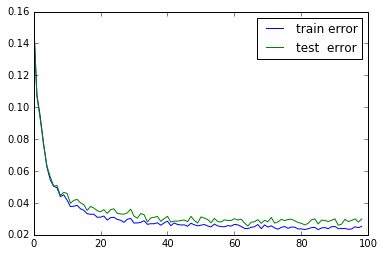

In [130]:
plt.plot(np.arange(res.shape[0]), res[:, 0], label='train error')
plt.plot(np.arange(res.shape[0]), res[:, 1], label='test  error')
plt.legend()

# Convolutional Neural Network


In machine learning, a convolutional neural network (CNN, or ConvNet) is a type of feed-forward artificial neural network in which the connectivity pattern between its neurons is inspired by the organization of the animal visual cortex, whose individual neurons are arranged in such a way that they respond to overlapping regions tiling the visual field. Convolutional networks were inspired by biological processes and are variations of multilayer perceptrons designed to use minimal amounts of preprocessing. (Wikipedia)


![a](d7.png)

### Motivation

Convolutional Neural Networks (CNN) are biologically-inspired variants of MLPs.
From Hubel and Wiesel's early work on the cat's visual cortex, we
know the visual cortex contains a complex arrangement of cells. These cells are
sensitive to small sub-regions of the visual field, called a *receptive
field*. The sub-regions are tiled to cover the entire visual field. These
cells act as local filters over the input space and are well-suited to exploit
the strong spatially local correlation present in natural images.

Additionally, two basic cell types have been identified: Simple cells respond
maximally to specific edge-like patterns within their receptive field. Complex
cells have larger receptive fields and are locally invariant to the exact
position of the pattern.

The animal visual cortex being the most powerful visual processing system in
existence, it seems natural to emulate its behavior. Hence, many
neurally-inspired models can be found in the literature. 

### Sparse Connectivity


CNNs exploit spatially-local correlation by enforcing a local connectivity
pattern between neurons of adjacent layers. In other words, the inputs of
hidden units in layer **m** are from a subset of units in layer **m-1**, units
that have spatially contiguous receptive fields. We can illustrate this
graphically as follows:

![A](sparse_1D_nn.png)

Imagine that layer **m-1** is the input retina. In the above figure, units in
layer **m** have receptive fields of width 3 in the input retina and are thus
only connected to 3 adjacent neurons in the retina layer. Units in layer
**m+1** have a similar connectivity with the layer below. We say that their
receptive field with respect to the layer below is also 3, but their receptive
field with respect to the input is larger (5). Each unit is unresponsive to
variations outside of its receptive field with respect to the retina. The
architecture thus ensures that the learnt "filters" produce the strongest
response to a spatially local input pattern.

However, as shown above, stacking many such layers leads to (non-linear)
"filters" that become increasingly "global" (i.e. responsive to a larger region
of pixel space). For example, the unit in hidden layer **m+1** can encode a
non-linear feature of width 5 (in terms of pixel space).

### Shared Weights


In addition, in CNNs, each filter $h_i$ is replicated across the entire
visual field. These replicated units share the same parameterization (weight
vector and bias) and form a *feature map*.

![](conv_1D_nn.png)

In the above figure, we show 3 hidden units belonging to the same feature map.
Weights of the same color are shared---constrained to be identical. Gradient
descent can still be used to learn such shared parameters, with only a small
change to the original algorithm. The gradient of a shared weight is simply the
sum of the gradients of the parameters being shared.

Replicating units in this way allows for features to be detected *regardless
of their position in the visual field.* Additionally, weight sharing increases
learning efficiency by greatly reducing the number of free parameters being
learnt. The constraints on the model enable CNNs to achieve better
generalization on vision problems.


### Details and Notation


A feature map is obtained by repeated application of a function across
sub-regions of the entire image, in other words, by *convolution* of the
input image with a linear filter, adding a bias term and then applying a
non-linear function. If we denote the k-th feature map at a given layer as
$h^k$, whose filters are determined by the weights $W^k$ and bias
$b_k$, then the feature map $h^k$ is obtained as follows (for
$tanh$ non-linearities):

$$
    h^k_{ij} = \tanh ( (W^k * x)_{ij} + b_k ).
$$

Note

* Recall the following definition of convolution for a 1D signal.
$$  o[n] = f[n]*g[n] = \sum_{u=-\infty}^{\infty} f[u] g[n-u] = \sum_{u=-\infty}^{\infty} f[n-u] g[u]`.
$$

* This can be extended to 2D as follows:

$$o[m,n] = f[m,n]*g[m,n] = \sum_{u=-\infty}^{\infty} \sum_{v=-\infty}^{\infty} f[u,v] g[m-u,n-v]`.
$$

To form a richer representation of the data, each hidden layer is composed of
*multiple* feature maps, $\{h^{(k)}, k=0..K\}$. The weights $W$ of
a hidden layer can be represented in a 4D tensor containing elements for every
combination of destination feature map, source feature map, source vertical
position, and source horizontal position. The biases $b$ can be
represented as a vector containing one element for every destination feature
map. We illustrate this graphically as follows:

**Figure 1**: example of a convolutional layer
![](cnn_explained.png)


The figure shows two layers of a CNN. **Layer m-1** contains four feature maps.
**Hidden layer m** contains two feature maps ($h^0$ and $h^1$).
Pixels (neuron outputs) in $h^0$ and $h^1$ (outlined as blue and
red squares) are computed from pixels of layer (m-1) which fall within their
2x2 receptive field in the layer below (shown as colored rectangles). Notice
how the receptive field spans all four input feature maps. The weights
$W^0$ and $W^1$ of $h^0$ and $h^1$ are thus 3D weight
tensors. The leading dimension indexes the input feature maps, while the other
two refer to the pixel coordinates.

Putting it all together, $W^{kl}_{ij}$ denotes the weight connecting
each pixel of the k-th feature map at layer m, with the pixel at coordinates
(i,j) of the l-th feature map of layer (m-1).

### The Convolution Operator


ConvOp is the main workhorse for implementing a convolutional layer in Theano.
ConvOp is used by ``theano.tensor.signal.conv2d``, which takes two symbolic inputs:


* a 4D tensor corresponding to a mini-batch of input images. The shape of the
  tensor is as follows: [mini-batch size, number of input feature maps, image
  height, image width].

* a 4D tensor corresponding to the weight matrix $W$. The shape of the
  tensor is: [number of feature maps at layer m, number of feature maps at
  layer m-1, filter height, filter width]

### MaxPooling


Another important concept of CNNs is *max-pooling,* which is a form of
non-linear down-sampling. Max-pooling partitions the input image into
a set of non-overlapping rectangles and, for each such sub-region, outputs the
maximum value.

Max-pooling is useful in vision for two reasons: 
* By eliminating non-maximal values, it reduces computation for upper layers.

* It provides a form of translation invariance. Imagine
     cascading a max-pooling layer with a convolutional layer. There are 8
     directions in which one can translate the input image by a single pixel.
     If max-pooling is done over a 2x2 region, 3 out of these 8 possible
     configurations will produce exactly the same output at the convolutional
     layer. For max-pooling over a 3x3 window, this jumps to 5/8.

     Since it provides additional robustness to position, max-pooling is a
     "smart" way of reducing the dimensionality of intermediate representations.

Max-pooling is done in Theano by way of
``theano.tensor.signal.downsample.max_pool_2d``. This function takes as input
an N dimensional tensor (where N >= 2) and a downscaling factor and performs
max-pooling over the 2 trailing dimensions of the tensor.


### The Full Model: CovNet


Sparse, convolutional layers and max-pooling are at the heart of the LeNet
family of models. While the exact details of the model will vary greatly,
the figure below shows a graphical depiction of a LeNet model.

![](mylenet.png)


The lower-layers are composed to alternating convolution and max-pooling
layers. The upper-layers however are fully-connected and correspond to a
traditional MLP (hidden layer + logistic regression). The input to the
first fully-connected layer is the set of all features maps at the layer
below.

From an implementation point of view, this means lower-layers operate on 4D
tensors. These are then flattened to a 2D matrix of rasterized feature maps,
to be compatible with our previous MLP implementation.


In [16]:
from theano.tensor.nnet.conv import conv2d
from theano.tensor.signal.downsample import max_pool_2d

def model(X, w, w2, w3, w4, p_drop_conv, p_drop_hidden):
    l1a = rectify(conv2d(X, w, border_mode='full'))
    l1 = max_pool_2d(l1a, (2, 2))
    l1 = dropout(l1, p_drop_conv)

    l2a = rectify(conv2d(l1, w2))
    l2 = max_pool_2d(l2a, (2, 2))
    l2 = dropout(l2, p_drop_conv)

    l3a = rectify(conv2d(l2, w3))
    l3b = max_pool_2d(l3a, (2, 2))
    # convert from 4tensor to normal matrix
    l3 = T.flatten(l3b, outdim=2)
    l3 = dropout(l3, p_drop_conv)

    l4 = rectify(T.dot(l3, w4))
    l4 = dropout(l4, p_drop_hidden)

    pyx = softmax(T.dot(l4, w_o))
    return l1, l2, l3, l4, pyx

/home/al/anaconda3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


reshape into conv 4tensor (b, c, 0, 1) format

In [38]:
trX = X_train2.reshape(-1, 1, 28, 28)
teX = X_test2.reshape(-1, 1, 28, 28)

In [39]:
# now 4tensor for conv instead of matrix
X = T.ftensor4()
Y = T.ivector()

In [52]:
w = init_weights((32, 1, 3, 3))
w2 = init_weights((64, 32, 3, 3))
w3 = init_weights((128, 64, 3, 3))
w4 = init_weights((128 * 3 * 3, 625))
# w4 = init_weights((128 * 3 * 3, 625))
w_o = init_weights((625, 10))

In [53]:
noise_l1, noise_l2, noise_l3, noise_l4, noise_py_x = model(X, w, w2, w3, w4, 0.2, 0.5)
l1, l2, l3, l4, py_x = model(X, w, w2, w3, w4, 0., 0.)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(noise_py_x, Y))
params = [w, w2, w3, w4, w_o]
updates = RMSprop(cost, params, lr=0.001)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

/home/al/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: pool_2d() will have the parameter ignore_border default value changed to True (currently False). To have consistent behavior with all Theano version, explicitly add the parameter ignore_border=True. On the GPU, using ignore_border=True is needed to use cuDNN. When using ignore_border=False and not using cuDNN, the only GPU combination supported is when `ds == st and padding == (0, 0) and mode == 'max'`. Otherwise, the convolution will be executed on CPU.
/home/al/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: pool_2d() will have the parameter ignore_border default value changed to True (currently False). To have consistent behavior with all Theano version, explicitly add the parameter ignore_border=True. On the GPU, using ignore_border=True is needed to use cuDNN. When using ignore_border=False and not using cuDNN, the only GPU combination supported is when `ds == st and p

In [54]:
trX.shape, X_train2.shape

((60000, 1, 28, 28), (60000, 784))

In [55]:
batch_size = 128
errors = []

for i in range(1, 2):
    
    for batch in range(0, X_test.shape[0], batch_size):
        cost = train(trX[batch:batch+batch_size], 
                     y_train[batch:batch+batch_size])   
        
    errors.append((np.mean(y_train != predict(trX)), 
                   np.mean(y_test != predict(teX))))
    print(i, errors[-1]) 

ValueError: Shape mismatch: x has 384 cols (and 128 rows) but y has 1152 rows (and 1250 cols)
Apply node that caused the error: Dot22(Elemwise{mul,no_inplace}.0, <TensorType(float32, matrix)>)
Toposort index: 68
Inputs types: [TensorType(float32, matrix), TensorType(float32, matrix)]
Inputs shapes: [(128, 384), (1152, 1250)]
Inputs strides: [(1536, 4), (5000, 4)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{maximum,no_inplace}(Dot22.0, TensorConstant{(1, 1) of 0.0}), Elemwise{Composite{(i0 * EQ(i1, i2) * i3)}}[(0, 0)](Dot22Scalar.0, Elemwise{maximum,no_inplace}.0, Dot22.0, Elemwise{Composite{Cast{float32}(LT(i0, i1))}}[(0, 0)].0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [129]:
res = np.array(errors)

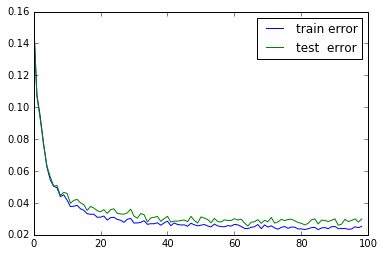

In [130]:
plt.plot(np.arange(res.shape[0]), res[:, 0], label='train error')
plt.plot(np.arange(res.shape[0]), res[:, 1], label='test  error')
plt.legend()